# **Problem Statement Chosen: Prediction of Flight Prices**

**Team Name:** TooDumb

**Team Members**:

- Naren Srinivasan M

- Aswath Venkatesh

- Govarthanan V



---

## 1. **Importing the fundamental libraries** (we have imported the rest as required)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. **Loading the dataset**

(haven't loaded test set, as no values for testing have been given and you have already confirmed that you will only be reading the code and not running it)

In [ ]:
df=pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## 3. **Checking if Null Values exist**

(removing null values as they are only 2 of them)

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df=df.dropna()
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


**Special case:** Additional_Info column will be removed as they are mostly null values (NaN = No info). We actually considered this as a categorical column first and it gave really impressive results


---


**CatBoost Regressor** (the model that gave best results, when additional_info column was taken into consideration, even without hyperparamter tuning):

MAE: 539.2515703957371

R2 Score: 0.9488200741642545

Accuracy: 93.3104678956529


---



However, this is relying on extremely untrustworthy data, so we decided that it would be best to remove this column. The flights having no additional info and flight price is simply **correlation and not causation**

In [ ]:
df.Additional_Info.value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [ ]:
df.drop('Additional_Info',axis=1,inplace=True)
df

<ipython-input-200-78c02aa6d30c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Additional_Info',axis=1,inplace=True)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648


## 4. **Checking if duplicated rows exist and removing them if they do**

In [ ]:
df.duplicated().sum()

220

In [ ]:
df=df.drop_duplicates()
df.duplicated().sum()

0

## 5. **Dealing with Duration Column**

(duration column will be converted to only minutes, making it easier for regression models to read it)

In [ ]:
def convert_duration(duration):
    if(len(duration.split())==2):
      return int(duration.split()[0][:-1])*60+int(duration.split()[1][:-1])
    return int(duration.split()[0][:-1])*60

df['Duration']=df['Duration'].apply(convert_duration)

<ipython-input-203-eacc9e8816ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration']=df['Duration'].apply(convert_duration)


## 6. **Dealing with Departure Time and Arrival Time columns**

Converting departure time and arrival time to two columns one with hours and one with minutes. We also considered using, a similar method as mentioned above (converting hours to minutes and adding it to minutes) but that gave lesser accuracy.

Moreover, we created a new column, 'Red_Eye', to indicate if a flight's duration spans across multiple days (called red eye flights). We are considering this as red eye flights are known to be comparatively cheaper

In [ ]:
def extract_time_components(time_str):
    h, m = map(int, time_str.split(':'))
    return pd.Series([h, m], index=['dep_hour', 'dep_min'])

df[['dep_hour', 'dep_min']] = df['Dep_Time'].apply(extract_time_components)
df[['dep_hour', 'dep_min']]

<ipython-input-204-faaaeb2414d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['dep_hour', 'dep_min']] = df['Dep_Time'].apply(extract_time_components)
<ipython-input-204-faaaeb2414d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['dep_hour', 'dep_min']] = df['Dep_Time'].apply(extract_time_components)


,dep_hour,dep_min
0,22,20
1,5,50
2,9,25
3,18,5
4,16,50
...,...,...
10678,19,55
10679,20,45
10680,8,20
10681,11,30


In [ ]:
def process_arrival_time(arrival_str):
    parts = arrival_str.split()
    time_str = parts[0]
    # Check if there is a date part indicating a red-eye flight
    is_red_eye = 1 if len(parts) > 1 else 0
    # Convert time to hours and minutes
    hours, minutes = map(int, time_str.split(':'))
    return pd.Series([is_red_eye, hours, minutes], index=['Red_Eye', 'Arrival_Hour', 'Arrival_Min'])
df[['Red_Eye', 'Arrival_Hour', 'Arrival_Min']] = df['Arrival_Time'].apply(process_arrival_time)
df.drop(columns=['Dep_Time', 'Arrival_Time'], inplace=True)
df.head()

<ipython-input-205-7f8104cda359>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Red_Eye', 'Arrival_Hour', 'Arrival_Min']] = df['Arrival_Time'].apply(process_arrival_time)
<ipython-input-205-7f8104cda359>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Red_Eye', 'Arrival_Hour', 'Arrival_Min']] = df['Arrival_Time'].apply(process_arrival_time)
<ipython-input-205-7f8104cda359>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,dep_hour,dep_min,Red_Eye,Arrival_Hour,Arrival_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,3897,22,20,1,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,7662,5,50,0,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,13882,9,25,1,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,6218,18,5,0,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,13302,16,50,0,21,35


## 7. **Dealing with Date of Journey Column**

Parsed the date first, then we converted it into 3 new columns. One for what month it is, one for what day of the month it is and another for what day of the week it is. We know that, flights depend on these factors

month - because of travel seasons, holidays, etc,

day of month - because of month ends and month beginning

day of week - because of weekdays and weekend difference

In [ ]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Date_of_Journey_Month']=df['Date_of_Journey'].dt.month
df['Date_of_Journey_Day']=df['Date_of_Journey'].dt.day
df['Date_of_Journey_Day_of_Week'] = df['Date_of_Journey'].dt.weekday
df.drop(['Date_of_Journey'],axis=1,inplace=True)
df.head()

<ipython-input-206-2b4119198594>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
<ipython-input-206-2b4119198594>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
<ipython-input-206-2b4119198594>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_of_Journey_Month']=d

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,dep_hour,dep_min,Red_Eye,Arrival_Hour,Arrival_Min,Date_of_Journey_Month,Date_of_Journey_Day,Date_of_Journey_Day_of_Week
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,3897,22,20,1,1,10,3,24,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,7662,5,50,0,13,15,5,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,13882,9,25,1,4,25,6,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,6218,18,5,0,23,30,5,12,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,13302,16,50,0,21,35,3,1,4


## 8. **Dealing with Total Stops Column**

Just used label encoding as this has an ordinal relationship, so it will model well for regression

In [ ]:
df['Total_Stops'].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3475
2 stops,1318
3 stops,43
4 stops,1


In [ ]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})


<ipython-input-208-1f6fe5575680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})


In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,dep_hour,dep_min,Red_Eye,Arrival_Hour,Arrival_Min,Date_of_Journey_Month,Date_of_Journey_Day,Date_of_Journey_Day_of_Week
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,1,10,3,24,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,0,13,15,5,1,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,1,4,25,6,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,0,23,30,5,12,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,0,21,35,3,1,4


## 9. **EDA for Categorical Columns**


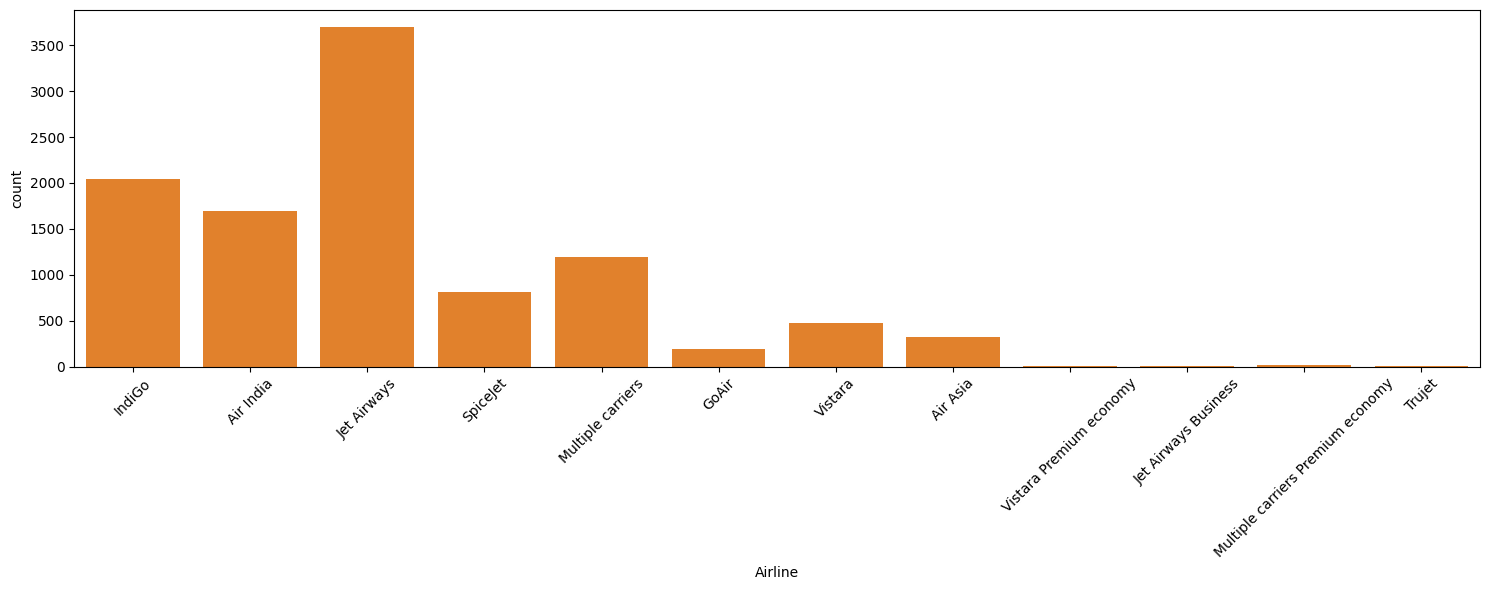

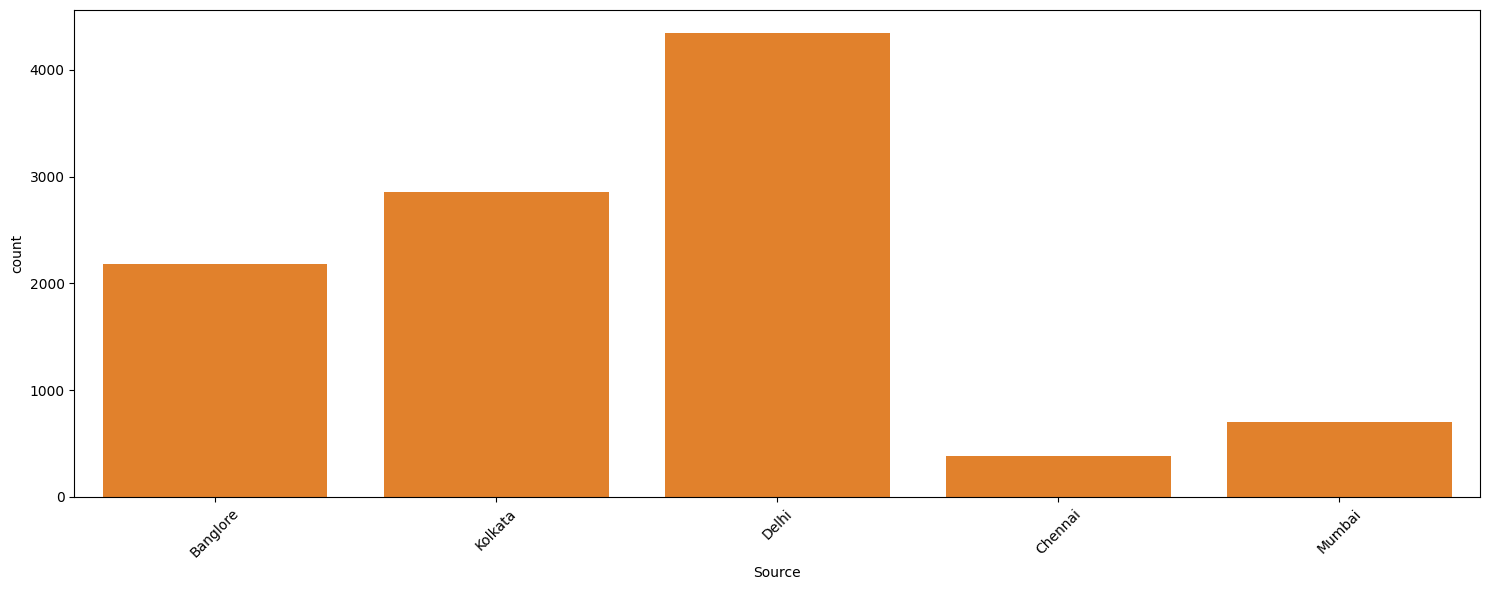

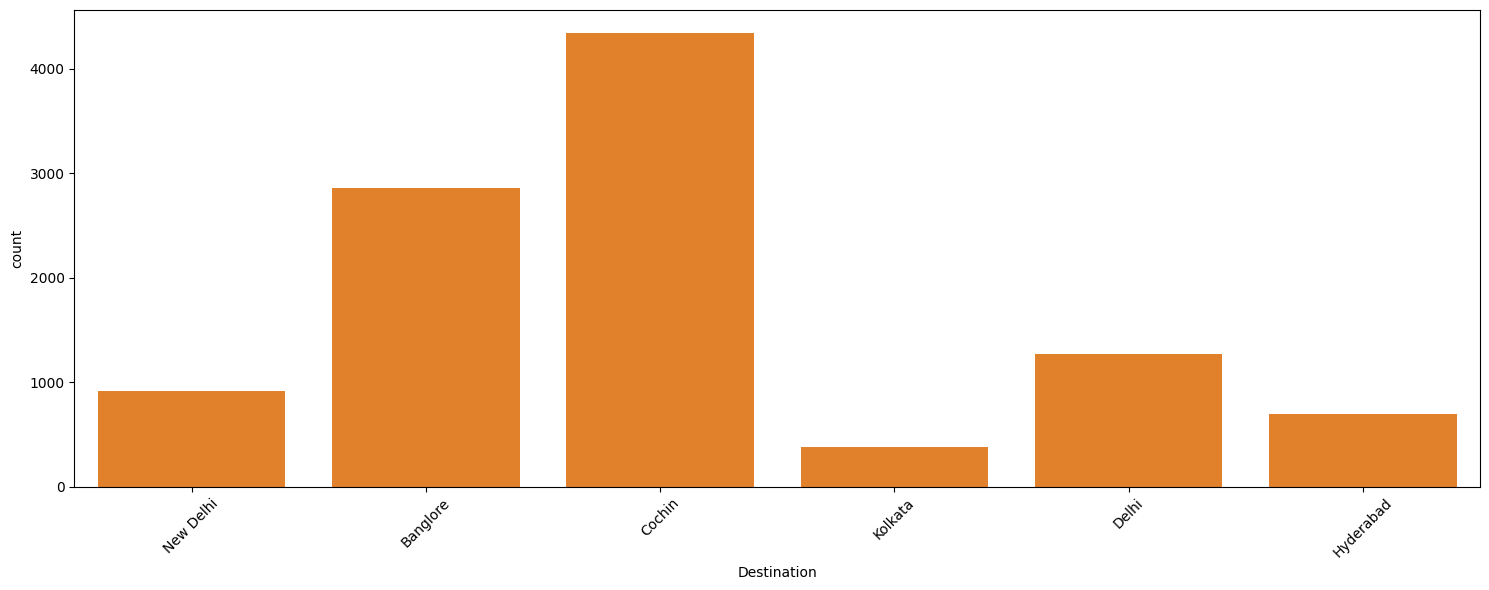

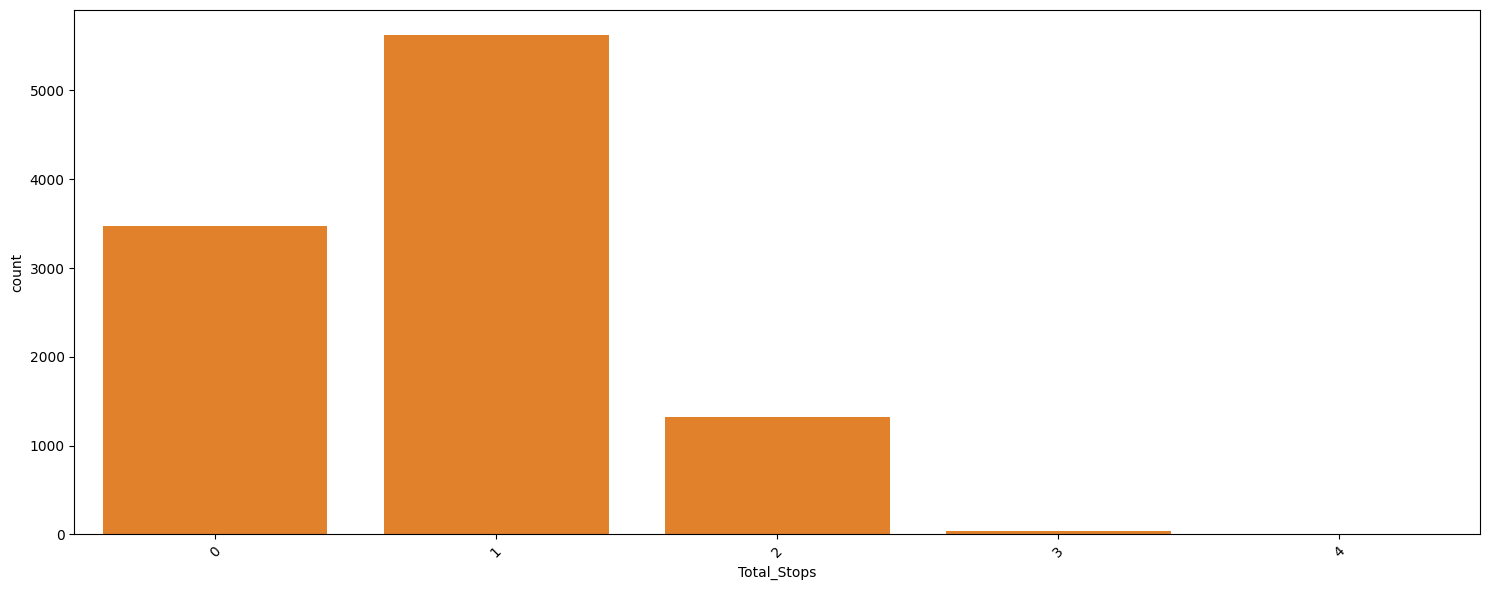

In [ ]:
for i in ['Airline', 'Source', 'Destination', 'Total_Stops']:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=df, x=i)
    ax = sns.countplot(x=i, data=df.sort_values('Price', ascending=True))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

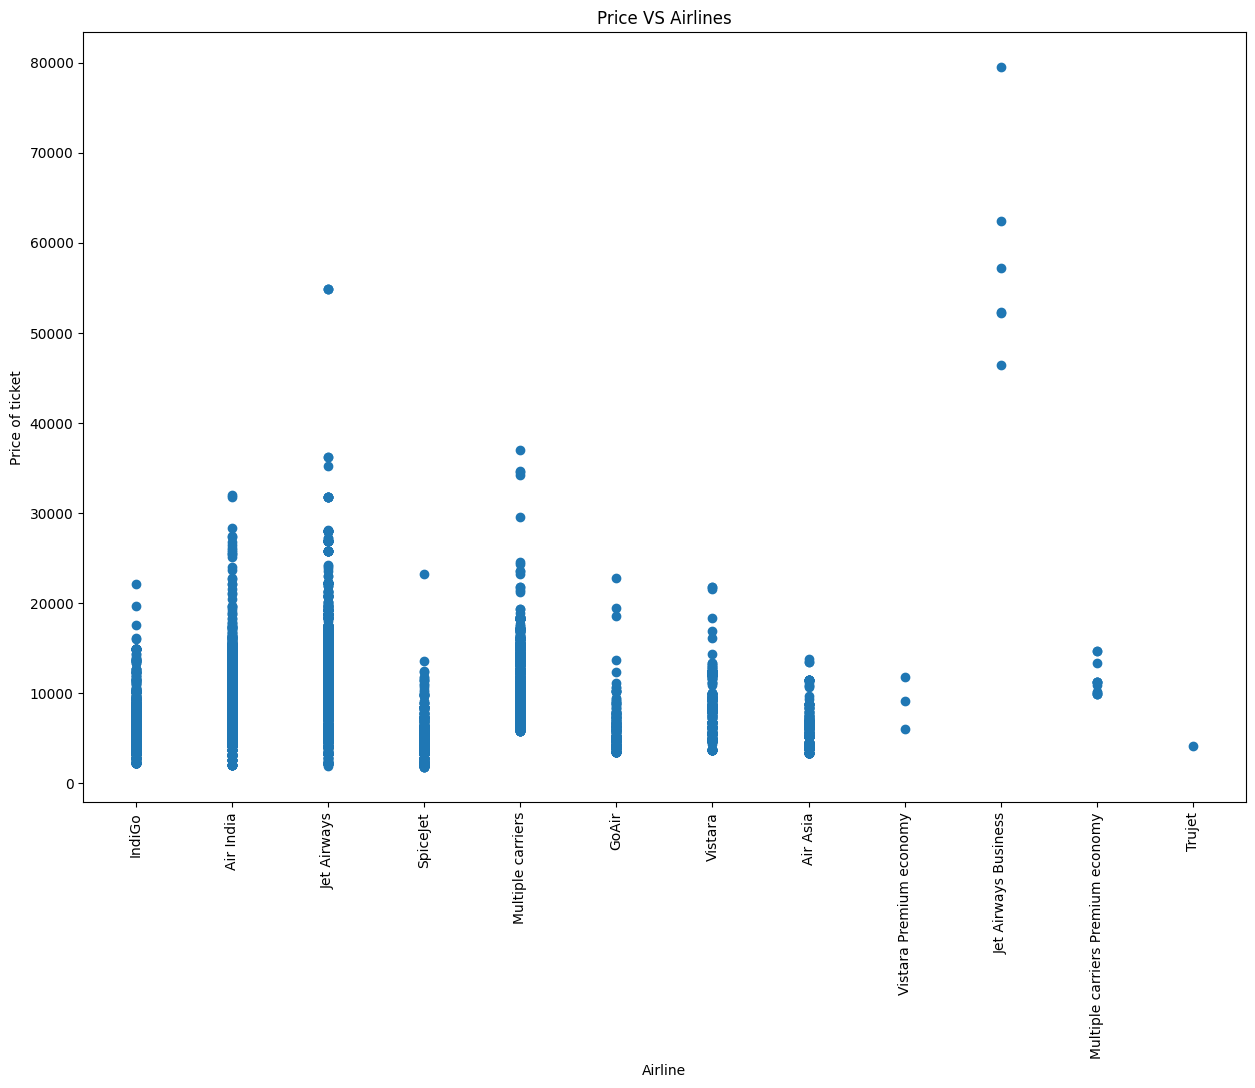

In [ ]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [ ]:
df.Airline.value_counts()

,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1694
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


## 10. **Dealing with Airline Column**

Merged the outliers into one single category, 'Other'. Performed one hot encoding as label encoding won't work for non-ordinal data in regression tasks. We consider target encoding/mean encoding but it had worse accuracy

In [ ]:
other_airlines = [
    'Multiple carriers Premium economy',
    'Jet Airways Business',
    'Vistara Premium economy',
    'Trujet'
]

df['Airline'] = df['Airline'].replace(other_airlines, 'Other')
df['Airline'].value_counts()

<ipython-input-213-9e571759263e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airline'] = df['Airline'].replace(other_airlines, 'Other')


,count
Airline,
Jet Airways,3700
IndiGo,2043
Air India,1694
Multiple carriers,1196
SpiceJet,815
Vistara,478
Air Asia,319
GoAir,194
Other,23


In [ ]:
df = pd.get_dummies(df, columns=['Airline'])
df.head()

,Source,Destination,Route,Duration,Total_Stops,Price,dep_hour,dep_min,Red_Eye,Arrival_Hour,...,Date_of_Journey_Day_of_Week,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,1,...,6,False,False,False,True,False,False,False,False,False
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,0,13,...,2,False,True,False,False,False,False,False,False,False
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,1,4,...,6,False,False,False,False,True,False,False,False,False
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,0,23,...,6,False,False,False,True,False,False,False,False,False
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,0,21,...,4,False,False,False,True,False,False,False,False,False


## **11. Dealing with Source and Destination Columns**

Both columns are one hot encoded for same reason as above

In [ ]:
df=pd.get_dummies(data=df,columns=['Source','Destination'],drop_first=True)
df.head()

,Route,Duration,Total_Stops,Price,dep_hour,dep_min,Red_Eye,Arrival_Hour,Arrival_Min,Date_of_Journey_Month,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,1,10,3,...,False,False,False,False,False,False,False,False,False,True
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,0,13,15,5,...,False,False,False,True,False,False,False,False,False,False
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,1,4,25,6,...,False,False,True,False,False,True,False,False,False,False
3,CCU → NAG → BLR,325,1,6218,18,5,0,23,30,5,...,False,False,False,True,False,False,False,False,False,False
4,BLR → NAG → DEL,285,1,13302,16,50,0,21,35,3,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.columns

Index(['Route', 'Duration', 'Total_Stops', 'Price', 'dep_hour', 'dep_min',
       'Red_Eye', 'Arrival_Hour', 'Arrival_Min', 'Date_of_Journey_Month',
       'Date_of_Journey_Day', 'Date_of_Journey_Day_of_Week',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Other', 'Airline_SpiceJet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

## 12. **Dealing with Route Column**

Now, this was a tricky part. We cannot just use one hot encoding as it is too discrete with 128 unique values. And we dont want to use target encoding because we may be losing on valuable data. So, we chose to extract all cities available, and then perform one hot encoding after. So for BLR to DEL, both BLR and DEL will have 1 while the rest will have 0. This will also include Source and destination, so we tried removing source and destination columns as they seemed to be redundant and added unfair biad, but that model had worse accuracy. So, the bias is fair, and source and destination stations matter more than intermediate stops

In [ ]:
df.Route.value_counts()

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
CCU → VTZ → BLR,1
CCU → IXZ → MAA → BLR,1
BOM → COK → MAA → HYD,1


In [ ]:
cities = set()
for route in df['Route']:
    cities.update(route.split(' → '))

# Step 2: One-hot encode cities
for city in cities:
    df[city] = df['Route'].apply(lambda x: 1 if city in x else 0)

In [ ]:
df.drop(['Route'],axis=1,inplace=True)
df.head()

,Duration,Total_Stops,Price,dep_hour,dep_min,Red_Eye,Arrival_Hour,Arrival_Min,Date_of_Journey_Month,Date_of_Journey_Day,...,VGA,PAT,GAU,BLR,CCU,DEL,ATQ,IXC,PNQ,JDH
0,170,0,3897,22,20,1,1,10,3,24,...,0,0,0,1,0,1,0,0,0,0
1,445,2,7662,5,50,0,13,15,5,1,...,0,0,0,1,1,0,0,0,0,0
2,1140,2,13882,9,25,1,4,25,6,9,...,0,0,0,0,0,1,0,0,0,0
3,325,1,6218,18,5,0,23,30,5,12,...,0,0,0,1,1,0,0,0,0,0
4,285,1,13302,16,50,0,21,35,3,1,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
df.shape

(10462, 71)

In [ ]:
df = df[[col for col in df.columns if col != 'Price'] + ['Price']]
df.head()

,Duration,Total_Stops,dep_hour,dep_min,Red_Eye,Arrival_Hour,Arrival_Min,Date_of_Journey_Month,Date_of_Journey_Day,Date_of_Journey_Day_of_Week,...,PAT,GAU,BLR,CCU,DEL,ATQ,IXC,PNQ,JDH,Price
0,170,0,22,20,1,1,10,3,24,6,...,0,0,1,0,1,0,0,0,0,3897
1,445,2,5,50,0,13,15,5,1,2,...,0,0,1,1,0,0,0,0,0,7662
2,1140,2,9,25,1,4,25,6,9,6,...,0,0,0,0,1,0,0,0,0,13882
3,325,1,18,5,0,23,30,5,12,6,...,0,0,1,1,0,0,0,0,0,6218
4,285,1,16,50,0,21,35,3,1,4,...,0,0,1,0,1,0,0,0,0,13302


## 13. **Removing Outliers in Duration and Price**

Using IQR method we removed outliers. It decreased accuracy slightly, but we thought it was a fair trade off for a more robust model

Text(0.5, 1.0, 'Boxplot of Duration')

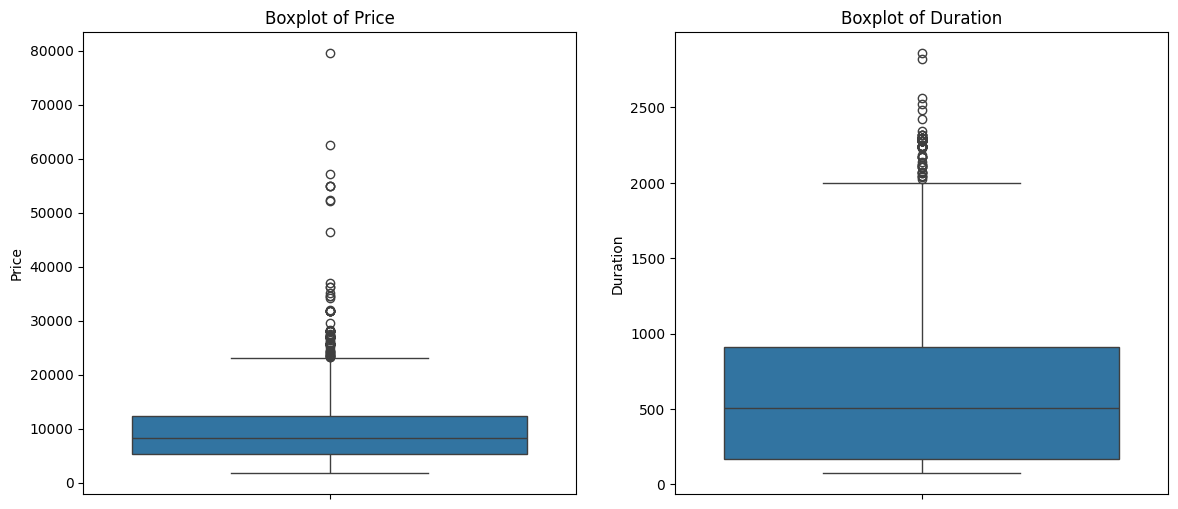

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Price'])
plt.title('Boxplot of Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Duration'])
plt.title('Boxplot of Duration')

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

df = remove_outliers_iqr(df, 'Price')
df = remove_outliers_iqr(df, 'Duration')


In [ ]:
df = df.astype(int)

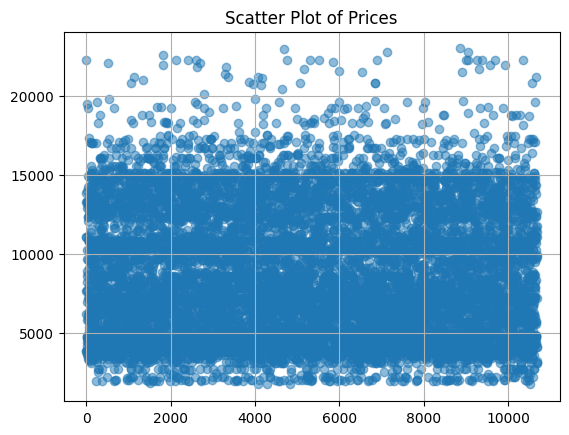

In [ ]:
plt.scatter(df.index, df['Price'], alpha=0.5)
plt.title('Scatter Plot of Prices')
plt.grid(True)
plt.show()

## 14. **Standardising the numerical data and splitting into Train and Test sets**

We tried feature selection, but it led to a drastic decrease in accuracy and the dimensionality is not extremely high such that it would cause extreme overfitting

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X=sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8235, 70), (2059, 70), (8235,), (2059,))

In [ ]:
!pip install catboost

## 15. **Building Models**

We tried several models, out of which four stood out the most. The result is to be expected, after all these models are the ones that can effectively use categorical data for a regression task

In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def accuracy(y_test, y_pred):
    errors = abs(y_test - y_pred)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    return accuracy


models = {
    'XGBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'k-Nearest Neighbors Regressor': KNeighborsRegressor(n_neighbors=5),
    'HistGradientBoosting Regressor': HistGradientBoostingRegressor(max_iter=100)
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    acc = accuracy(y_test, y_pred)

    # Store the results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'Accuracy': acc
    }

# Print results for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

Model: XGBoost Regressor
MAE: 1004.9645978900749
MSE: 2137779.6206465606
RMSE: 1462.114776837496
R2 Score: 0.8734080316070169
Accuracy: 88.3716884374587


Model: CatBoost Regressor
MAE: 989.5171928024705
MSE: 1992244.167794738
RMSE: 1411.4687980237954
R2 Score: 0.882026141382946
Accuracy: 88.44064649628615


Model: k-Nearest Neighbors Regressor
MAE: 1260.7346284604178
MSE: 3582914.0747741624
RMSE: 1892.85870438714
R2 Score: 0.787832131559283
Accuracy: 85.42322389814302


Model: HistGradientBoosting Regressor
MAE: 1058.8848024936399
MSE: 2131643.6195523418
RMSE: 1460.0149381264364
R2 Score: 0.8737713845219182
Accuracy: 87.47963403509878




## 16. **Hyperparameter Tuning**

We performed hyperparamter tuning using randomizedcv search (code is below all) and used the best paramters here.

In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def accuracy(y_test, y_pred):
    errors = abs(y_test - y_pred)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    return accuracy


models = {
    'XGBoost Regressor': XGBRegressor(
        subsample=0.8,
        n_estimators=200,
        min_child_weight=7,
        max_depth=7,
        learning_rate=0.1,
        gamma=0,
        colsample_bytree=0.6
    ),
    'CatBoost Regressor': CatBoostRegressor(
        learning_rate=0.1,
        l2_leaf_reg=3,
        iterations=1000,
        depth=6,
        border_count=64,
        bagging_temperature=0.0,
        verbose=0
    ),
    'k-Nearest Neighbors Regressor': KNeighborsRegressor(
        weights='uniform',
        p=1,
        n_neighbors=5,
        algorithm='auto'
    ),
    'HistGradientBoosting Regressor': HistGradientBoostingRegressor(
        min_samples_leaf=4,
        max_leaf_nodes=40,
        max_iter=500,
        max_depth=5,
        learning_rate=0.1,
        l2_regularization=1.0
    )
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    acc = accuracy(y_test, y_pred)

    # Store the results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2,
        'Accuracy': acc
    }

# Print results for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

Model: XGBoost Regressor
MAE: 999.1631907555245
MSE: 2124630.174190723
RMSE: 1457.6111189856927
R2 Score: 0.8741866966733529
Accuracy: 88.49157706975383


Model: CatBoost Regressor
MAE: 973.2663489490851
MSE: 2016347.5150136102
RMSE: 1419.9815192507297
R2 Score: 0.880598823927102
Accuracy: 88.7403493847095


Model: k-Nearest Neighbors Regressor
MAE: 1223.2192326372024
MSE: 3444878.673025741
RMSE: 1856.0384352231881
R2 Score: 0.7960061140626637
Accuracy: 85.87612934477097


Model: HistGradientBoosting Regressor
MAE: 1006.4701662711876
MSE: 2117415.965517223
RMSE: 1455.1343462090442
R2 Score: 0.874613897338733
Accuracy: 88.33290820098595




In [ ]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


## 17. **Stacking the models**

We tried using ResNet (deep learning) for a better model, but it lacked accuracy. but we ensembled it using stacking regressor. Once with XGBoost as the meta model and then with Ridge regressor as the meta model. The former was the better one and our best in terms of accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Add, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.base import BaseEstimator, RegressorMixin

def residual_block(x, filters, kernel_size=3, stride=1, padding='same'):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding=padding, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size, strides=stride, padding=padding)(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)
    return x

def create_resnet_model(input_dim):
    inputs = Input(shape=(input_dim, 1))
    x = Conv1D(64, 7, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2)(x)

    for _ in range(3):
        x = residual_block(x, 64)

    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss=MeanSquaredError())
    return model

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, epochs=50, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

resnet_regressor = KerasRegressorWrapper(build_fn=lambda: create_resnet_model(X_train_resnet.shape[1]),
                                         epochs=50, batch_size=32, verbose=0)


In [ ]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('xgb', XGBRegressor(
        subsample=0.8,
        n_estimators=200,
        min_child_weight=7,
        max_depth=7,
        learning_rate=0.1,
        gamma=0,
        colsample_bytree=0.6
    )),
    ('catboost', CatBoostRegressor(
        learning_rate=0.1,
        l2_leaf_reg=3,
        iterations=1000,
        depth=6,
        border_count=64,
        bagging_temperature=0.0,
        verbose=0
    )),
    ('knn', KNeighborsRegressor(
        weights='uniform',
        p=1,
        n_neighbors=5,
        algorithm='auto'
    )),
    ('hist', HistGradientBoostingRegressor(
        min_samples_leaf=4,
        max_leaf_nodes=40,
        max_iter=500,
        max_depth=5,
        learning_rate=0.1,
        l2_regularization=1.0
    )),
    ('resnet', resnet_regressor)
]

final_estimator = XGBRegressor()

stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=True
)

X_train_resnet = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_resnet = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

stacking_regressor.fit(X_train, y_train)

y_pred_stacking = stacking_regressor.predict(X_test)

results['Stacking Regressor'] = {
    'MAE': mean_absolute_error(y_test, y_pred_stacking),
    'MSE': mean_squared_error(y_test, y_pred_stacking),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_stacking)),
    'R2 Score': r2_score(y_test, y_pred_stacking),
    'Accuracy': accuracy(y_test, y_pred_stacking)
}

print("Model: Stacking Regressor")
for metric, value in results['Stacking Regressor'].items():
    print(f"{metric}: {value}")


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Model: Stacking Regressor
MAE: 999.0661530978706
MSE: 2231253.763123851
RMSE: 1493.7381842625068
R2 Score: 0.8678728138625107
Accuracy: 88.83765541914786


In [ ]:
from sklearn.linear_model import Ridge

estimators = [
    ('xgb', XGBRegressor(
        subsample=0.8,
        n_estimators=200,
        min_child_weight=7,
        max_depth=7,
        learning_rate=0.1,
        gamma=0,
        colsample_bytree=0.6
    )),
    ('catboost', CatBoostRegressor(
        learning_rate=0.1,
        l2_leaf_reg=3,
        iterations=1000,
        depth=6,
        border_count=64,
        bagging_temperature=0.0,
        verbose=0
    )),
    ('knn', KNeighborsRegressor(
        weights='uniform',
        p=1,
        n_neighbors=5,
        algorithm='auto'
    )),
    ('hist', HistGradientBoostingRegressor(
        min_samples_leaf=4,
        max_leaf_nodes=40,
        max_iter=500,
        max_depth=5,
        learning_rate=0.1,
        l2_regularization=1.0
    ))
]

final_estimator = Ridge()

stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    passthrough=True
)

stacking_regressor.fit(X_train, y_train)

y_pred_stacking = stacking_regressor.predict(X_test)

results = {}
results['Stacking Regressor'] = {
    'MAE': mean_absolute_error(y_test, y_pred_stacking),
    'MSE': mean_squared_error(y_test, y_pred_stacking),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_stacking)),
    'R2 Score': r2_score(y_test, y_pred_stacking),
    'Accuracy': accuracy(y_test, y_pred_stacking)
}

print("Model: Stacking Regressor")
for metric, value in results['Stacking Regressor'].items():
    print(f"{metric}: {value}")


Model: Stacking Regressor
MAE: 973.0337928445676
MSE: 2015269.3905841685
RMSE: 1419.6018422727439
R2 Score: 0.8806626667537327
Accuracy: 88.76644824724377


# **Conclusion**

In this machine learning hackathon, we focused on predicting outcomes using various regression models, including XGBoost, CatBoost, k-Nearest Neighbors, and HistGradientBoosting, alongside a ResNet model. By employing a stacked regression approach, we combined the strengths of multiple models to enhance predictive accuracy. Hyperparameter tuning was rigorously performed to optimize each model's performance, leading to improved metrics.

Our best and most robust model, the Stacking Regressor with an XGBoost meta-model, demonstrated the ability to generalize across test data, indicating that the ensemble approach successfully leveraged the complementary strengths of the individual models.

Future work could explore additional feature engineering, model variants, and data augmentation techniques to further refine the model's performance. Also, we could try generalising the model more by removing the date of journey month column (because, it has only 4 months, which is optimal if you have a different month on the set)

(PS: We did try data augmentation techniques, but there was some data leakage problems, so we decided not to include that)



## **Extra: Hyperparameter Tuning of individual models**


In [ ]:
#catboost

from sklearn.model_selection import RandomizedSearchCV
catboost_model = CatBoostRegressor(verbose=0)

param_distributions = {
    'iterations': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.0, 0.2, 0.5, 1.0],
    'border_count': [32, 64, 128]
}

random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
acc= accuracy(y_test,y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)
print("Accuracy: ", acc)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 6, 'border_count': 64, 'bagging_temperature': 0.0}
MAE:  976.137868722688
MSE:  1991292.2369003913
RMSE:  1411.1315448605035
R2 Score:  0.8820825114617538
Accuracy:  88.73102991371155


In [ ]:
#xgboost

xgb_model = XGBRegressor()

xgb_param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_distributions,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_random_search.fit(X_train, y_train)


print("Best parameters found for XGBRegressor: ", xgb_random_search.best_params_)

best_xgb_model = xgb_random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)


mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
acc_xgb = accuracy(y_test, y_pred_xgb)

print("MAE for XGBRegressor: ", mae_xgb)
print("MSE for XGBRegressor: ", mse_xgb)
print("RMSE for XGBRegressor: ", rmse_xgb)
print("R2 Score for XGBRegressor: ", r2_xgb)
print("Accuracy for XGBRegressor: ", acc_xgb)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found for XGBRegressor:  {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
MAE for XGBRegressor:  998.17243732973
MSE for XGBRegressor:  2094696.053892949
RMSE for XGBRegressor:  1447.3064823640323
R2 Score for XGBRegressor:  0.8759592924891281
Accuracy for XGBRegressor:  88.43447445548523


In [ ]:
#knn

knn_model = KNeighborsRegressor()

knn_param_distributions = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2] }

knn_random_search = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=knn_param_distributions,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


knn_random_search.fit(X_train, y_train)

print("Best parameters found for KNeighborsRegressor: ", knn_random_search.best_params_)


best_knn_model = knn_random_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
acc_knn = accuracy(y_test, y_pred_knn)

print("MAE for KNeighborsRegressor: ", mae_knn)
print("MSE for KNeighborsRegressor: ", mse_knn)
print("RMSE for KNeighborsRegressor: ", rmse_knn)
print("R2 Score for KNeighborsRegressor: ", r2_knn)
print("Accuracy for KNeighborsRegressor: ", acc_knn)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found for KNeighborsRegressor:  {'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'algorithm': 'auto'}
MAE for KNeighborsRegressor:  1202.9995143273434
MSE for KNeighborsRegressor:  3343606.162603205
RMSE for KNeighborsRegressor:  1828.55302427991
R2 Score for KNeighborsRegressor:  0.8020031243787272
Accuracy for KNeighborsRegressor:  86.2341673672063


In [ ]:
#histgbr

histgbr_model = HistGradientBoostingRegressor()

histgbr_param_distributions = {
    'max_iter': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [1, 2, 4],
    'l2_regularization': [0.0, 0.1, 0.5, 1.0],
    'max_leaf_nodes': [20, 40, 60, 80, 100]
}

histgbr_random_search = RandomizedSearchCV(
    estimator=histgbr_model,
    param_distributions=histgbr_param_distributions,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

histgbr_random_search.fit(X_train, y_train)

print("Best parameters found for HistGradientBoostingRegressor: ", histgbr_random_search.best_params_)

best_histgbr_model = histgbr_random_search.best_estimator_
y_pred_histgbr = best_histgbr_model.predict(X_test)

mae_histgbr = mean_absolute_error(y_test, y_pred_histgbr)
mse_histgbr = mean_squared_error(y_test, y_pred_histgbr)
rmse_histgbr = np.sqrt(mse_histgbr)
r2_histgbr = r2_score(y_test, y_pred_histgbr)
acc_histgbr = accuracy(y_test, y_pred_histgbr)

print("MAE for HistGradientBoostingRegressor: ", mae_histgbr)
print("MSE for HistGradientBoostingRegressor: ", mse_histgbr)
print("RMSE for HistGradientBoostingRegressor: ", rmse_histgbr)
print("R2 Score for HistGradientBoostingRegressor: ", r2_histgbr)
print("Accuracy for HistGradientBoostingRegressor: ", acc_histgbr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found for HistGradientBoostingRegressor:  {'min_samples_leaf': 4, 'max_leaf_nodes': 40, 'max_iter': 500, 'max_depth': 5, 'learning_rate': 0.1, 'l2_regularization': 1.0}
MAE for HistGradientBoostingRegressor:  1004.1241138924927
MSE for HistGradientBoostingRegressor:  2100122.7264087056
RMSE for HistGradientBoostingRegressor:  1449.1800186342293
R2 Score for HistGradientBoostingRegressor:  0.8756379435769395
Accuracy for HistGradientBoostingRegressor:  88.33848197655904
